## PCA on Wine Data

### We will apply pca on wine dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
wine = pd.read_csv('C:\\Users\\Vaibhav\\Desktop\\BA\\Datasets\\wine.csv', index_col=0)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1952 to 1978
Data columns (total 6 columns):
Price          25 non-null float64
WinterRain     25 non-null int64
AGST           25 non-null float64
HarvestRain    25 non-null int64
Age            25 non-null int64
FrancePop      25 non-null float64
dtypes: float64(3), int64(3)
memory usage: 1.4 KB


In [19]:
wine.head(3)

,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,,,,,,
1952,7.4950,600,17.1167,160,31,43183.569
1953,8.0393,690,16.7333,80,30,43495.030
1955,7.6858,502,17.1500,130,28,44217.857


In [21]:
wine.columns[1:7]

Index(['WinterRain', 'AGST', 'HarvestRain', 'Age', 'FrancePop'], dtype='object')

### Applying PCA on relevant predictors

In [22]:
wine.iloc[:3,1:7]

,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,,,,,
1952,600,17.1167,160,31,43183.569
1953,690,16.7333,80,30,43495.030
1955,502,17.1500,130,28,44217.857


In [9]:
scalar = StandardScaler()

In [23]:
scalar.fit(wine.iloc[:,1:7])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scalar.transform(wine.iloc[:,1:7])

array([[-0.04073904,  0.91781344,  0.15689311,  1.83106988, -1.81299772],
       [ 0.65367643,  0.33844148, -0.9402615 ,  1.69838366, -1.72626917],
       [-0.79688033,  0.96813448, -0.25453987,  1.43301121, -1.52499282],
       [-1.42956998, -0.56824391, -0.52882852,  1.16763876, -1.26480385],
       [-0.17962214, -0.13998618,  0.52718279,  1.03495254, -1.12514283],
       [-0.9280477 ,  1.47179821,  0.52718279,  0.90226632, -0.99292218],
       [ 1.21692453, -0.13998618,  1.93976934,  0.76958009, -0.86612477],
       [ 1.73387827,  1.24512687, -1.51626767,  0.63689387, -0.71464129],
       [ 0.70768652, -0.31633649, -1.32426561,  0.50420765, -0.44713641],
       [ 0.02098678, -1.1977858 ,  0.08832095,  0.37152142, -0.24934356],
       [-1.56845308,  1.14448479, -0.72083058,  0.2388352 , -0.09397755],
       [-0.02530759, -1.72668561,  1.6243374 ,  0.10614898,  0.02990191],
       [ 1.64900527,  0.03621301, -0.8579749 , -0.02653724,  0.15608338],
       [ 0.83885389, -0.41712968, -0.4

In [25]:
X = pd.DataFrame(scalar.transform(wine.iloc[:,1:7]),columns=wine.columns[1:7])
X.head(3)

,WinterRain,AGST,HarvestRain,Age,FrancePop
0,-0.040739,0.917813,0.156893,1.831070,-1.812998
1,0.653676,0.338441,-0.940261,1.698384,-1.726269
2,-0.796880,0.968134,-0.254540,1.433011,-1.524993


In [26]:
X.mean(),X.std()

(WinterRain     1.865175e-16
 AGST          -1.962874e-15
 HarvestRain   -1.776357e-17
 Age            1.865175e-16
 FrancePop      8.437695e-16
 dtype: float64, WinterRain     1.020621
 AGST           1.020621
 HarvestRain    1.020621
 Age            1.020621
 FrancePop      1.020621
 dtype: float64)

In [7]:
pca_wine = PCA()

In [27]:
pca_wine.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca_wine.components_

array([[-0.09395915,  0.32836427, -0.0367977 ,  0.66342357, -0.66472828],
       [-0.73840464,  0.38065779,  0.52444119, -0.12589423,  0.13773276],
       [ 0.12564301, -0.62649747,  0.72388065,  0.19142246, -0.17626401],
       [-0.65563602, -0.59544647, -0.44675373,  0.10156506, -0.07536942],
       [-0.01689675, -0.01486508,  0.00390888, -0.70502609, -0.70881341]])

In [29]:
pca_wine.components_.shape

(5, 5)

In [30]:
pca_loadings = pd.DataFrame(pca_wine.components_,index = ['PC1','PC2','PC3','PC4', 'PC5'],columns=wine.columns[1:7])
pca_loadings
pca_loadings.T
#PC1 = -.09 * WinterRain + .328 * AGST -.03 * HarvestRain + .663 * Age -.6647*FrancePop

,PC1,PC2,PC3,PC4,PC5
WinterRain,-0.093959,-0.738405,0.125643,-0.655636,-0.016897
AGST,0.328364,0.380658,-0.626497,-0.595446,-0.014865
HarvestRain,-0.036798,0.524441,0.723881,-0.446754,0.003909
Age,0.663424,-0.125894,0.191422,0.101565,-0.705026
FrancePop,-0.664728,0.137733,-0.176264,-0.075369,-0.708813


In [35]:
pca_wine.explained_variance_

array([2.21105199, 1.41517051, 1.03183011, 0.54493978, 0.00534095])

In [32]:
pca_wine.explained_variance_ratio_

array([0.42452198, 0.27171274, 0.19811138, 0.10462844, 0.00102546])

In [37]:
PCscore = pd.DataFrame(pca_wine.fit_transform(X),columns=pca_loadings.T.columns)
PCscore[:7]

,PC1,PC2,PC3,PC4,PC5
0,2.719357,-0.018494,0.203520,-0.267274,-0.018217
1,2.358560,-1.298540,-0.181152,0.092572,0.006447
2,2.366541,0.433008,-0.347801,0.320190,0.068703
3,1.582580,0.240751,0.240031,1.725811,0.103829
4,1.386038,0.070560,0.843185,0.155517,0.075024
5,1.809694,1.271655,-0.309333,-0.336962,0.063539
6,0.854608,-0.150754,1.944742,-1.437663,0.060448


### Create Bi-plot

                  PC1       PC2       PC3       PC4       PC5
WinterRain  -0.093959 -0.738405  0.125643 -0.655636 -0.016897
AGST         0.328364  0.380658 -0.626497 -0.595446 -0.014865
HarvestRain -0.036798  0.524441  0.723881 -0.446754  0.003909
Age          0.663424 -0.125894  0.191422  0.101565 -0.705026
FrancePop   -0.664728  0.137733 -0.176264 -0.075369 -0.708813


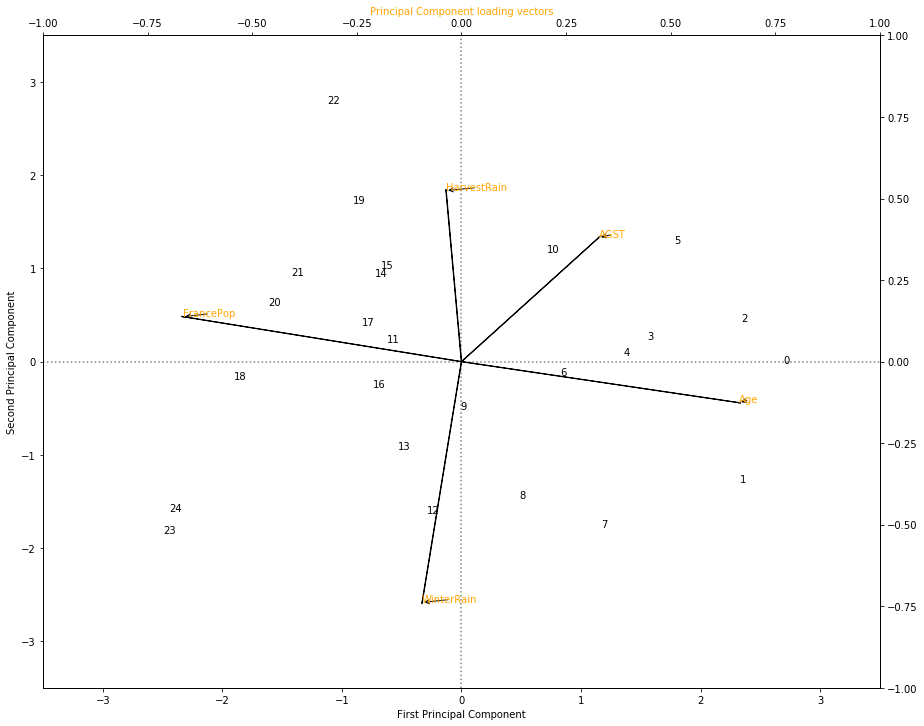

In [45]:
fig,ax1 =plt.subplots(figsize=(15,12))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in PCscore.index:
    ax1.annotate(i, (PCscore.PC1.loc[i], PCscore.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
print(pca_loadings.T)
for i in pca_loadings.T[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.T.PC1.loc[i], pca_loadings.T.PC2.loc[i]), color='orange')
    
# Plot vectors
ax2.arrow(0,0,pca_loadings.T.PC1[0], pca_loadings.T.PC2[0])
ax2.arrow(0,0,pca_loadings.T.PC1[1], pca_loadings.T.PC2[1])
ax2.arrow(0,0,pca_loadings.T.PC1[2], pca_loadings.T.PC2[2])
ax2.arrow(0,0,pca_loadings.T.PC1[3], pca_loadings.T.PC2[3])
ax2.arrow(0,0,pca_loadings.T.PC1[4], pca_loadings.T.PC2[4])

### Creating Scree and Cumulative Plots

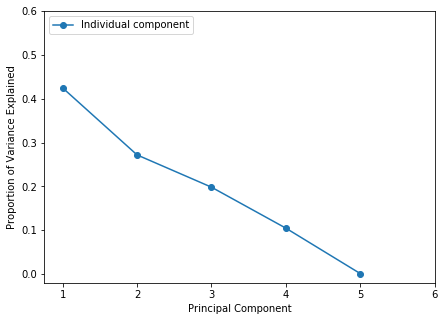

In [46]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5],pca_wine.explained_variance_ratio_, '-o', label='Individual component')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(-0.02,0.6)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2);

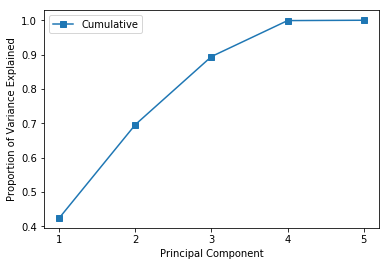

In [47]:
plt.plot([1,2,3,4,5], np.cumsum(pca_wine.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
#plt.xlim(0.75,4.25)
#plt.ylim(0.3,1.05)
plt.xticks([1,2,3,4,5])
plt.legend(loc=2);

In [ ]:
#Select upto PC4

### Building linear regression model using Principle components

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm=LinearRegression()

In [50]:
lm.fit(PCscore.iloc[:,:4],wine.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
lm.coef_

array([ 0.24972259, -0.12473195, -0.40900723, -0.18269989])

In [52]:
#Accuracy on training data
lm.score(PCscore.iloc[:,:4],wine.Price)

0.8291961446571084

### Making Predictions

We cannot convert test data into principal components, by applying pca. Instead we have to apply same transformations on test data as we did for train data

In [53]:
wineTest = pd.read_csv('C:\\Users\\Vaibhav\\Desktop\\BA\\Datasets\\wine_test.csv')
wineTest

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


In [54]:
test_scaled = scalar.transform(wineTest.iloc[:,2:7])
test_scaled

array([[ 0.86200107, -0.51777176, -0.36425533, -1.75145815,  1.43165829],
       [-0.21048505, -0.76967918, -1.02254809, -1.88414437,  1.50806805]])

In [55]:
pca_test = pca_wine.transform(test_scaled)
pca_test

array([[-2.35122924, -0.60694522, -0.41860853, -0.37991137,  0.21175297],
       [-2.44777199, -0.2289143 , -0.91093235,  0.74810605,  0.27043292]])

In [56]:
pca_test.shape

(2, 5)

In [57]:
y_pred = lm.predict(pca_test[:,0:4])
y_pred

array([6.79639808, 6.72041199])

In [58]:
wineTest.Price

0    6.9541
1    6.4979
Name: Price, dtype: float64

In [59]:
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
MSE = mean_squared_error(wineTest.Price,y_pred)
MSE

0.037190741030925754

In [61]:
SSE = MSE*wineTest.shape[0]
SSE

0.07438148206185151

In [62]:
SST = np.sum((wineTest.Price-np.mean(wine.Price))**2)
SST

0.3369268563519997

In [63]:
1-SSE/SST

0.7792355205304784